# CHAPTER 8: MULTI-GROUP AND CATEGORICAL DATA ANALYSIS
***(Week 14: Lecture Notes)***

---

## 1. INTRODUCTION: WHY IS THE T-TEST NOT ENOUGH?

So far, in the topics we have covered (especially the T-Test), our analyses were always limited to **"two groups"**. 
*For example: Is there a difference between Method A and Method B?*

However, in real-world engineering applications, we often need to evaluate more than two options simultaneously.

**Examples:**
*   Performance of **3** different concrete additives.
*   Calibration differences of **4** different measuring devices.

If we have 3 groups (A, B, C) and try to compare them using T-Tests, we would have to analyze them one by one: A-B, A-C, and B-C. This method not only increases the workload but also statistically increases the probability of making an **Error (Type-1 Error)** exponentially.

To solve this problem, we use the **ANOVA** method.

On the other hand, if our data is not numerical (metric) but **categorical** (e.g., Defective/Sound, Colors, Brands), we cannot calculate an average. In this case, we turn to the **Chi-Square Test**.

## 2. ANOVA (ANALYSIS OF VARIANCE)

**Purpose:** To determine if there is a statistically significant difference between the means of three or more groups using a single test.

**Basic Logic (F-Test):** 
ANOVA analyzes **Variances** (Changes) to compare group means. It compares two types of variation:

1.  **Between-Group Variance:** How far apart are the group means? (A large difference here indicates the groups are different).
2.  **Within-Group Variance:** How consistent is each group within itself? (This is the "noise" or error in the system).

**Formula (F-Value):**
$$
F = \frac{\text{Between-Group Variance}}{\text{Within-Group Variance}}
$$

**Interpretation:**
If the calculated F value is large, the difference between groups is greater than the random error (noise). 
**Result:** H0 is Rejected -> The groups are different.

### 2.1. Application Example: Concrete Additives

An engineer is testing **3 different chemical additives (A, B, and C)** thought to affect concrete strength. **5 samples** were taken from each additive.

*   **H0 (Null Hypothesis):** $\mu_A = \mu_B = \mu_C$ (There is no difference between additives).
*   **H1 (Alternative Hypothesis):** At least one group mean is different.

**Analysis Results:**
The following values were obtained from calculations:

*   **F-Calculated:** 5.42
*   **F-Table (Critical Value):** 3.89

**Decision:**
Since the calculated F value is greater than the Table value ($5.42 > 3.89$):
**RESULT: H0 REJECTED.**

**Comment:** The three additives used have statistically different effects on concrete. (To find out *which* additive is the best, post-hoc tests like Tukey are required).

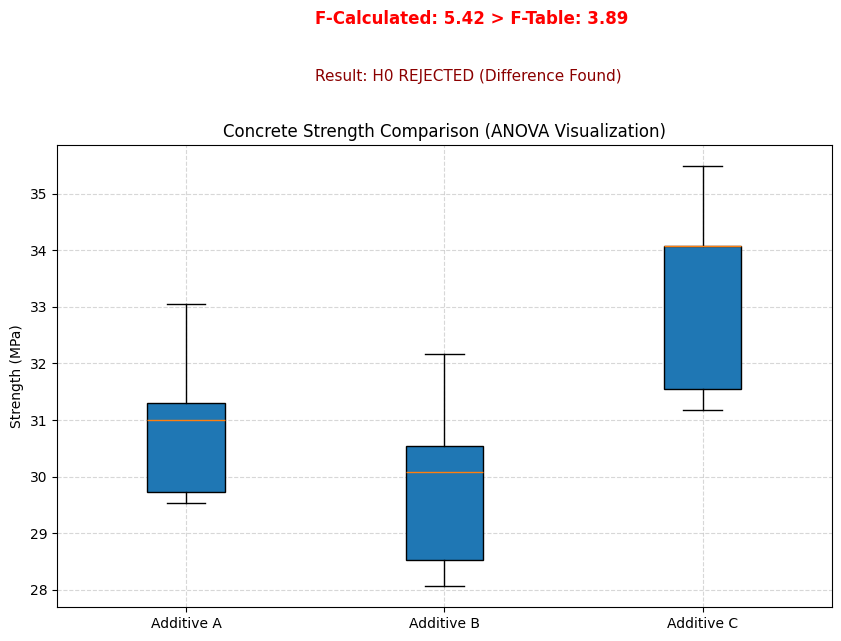

In [1]:
# Python Visualization: ANOVA Logic
# Let's visualize what "Significant Difference" looks like with simulated data matching our problem.

import matplotlib.pyplot as plt
import numpy as np

# Simulating data for 3 Concrete Additives
# We make Group C slightly stronger to match the "H0 Rejected" scenario
np.random.seed(42)
group_A = np.random.normal(30, 2, 5)
group_B = np.random.normal(29, 2, 5)
group_C = np.random.normal(35, 2, 5) # This group is different

data = [group_A, group_B, group_C]

plt.figure(figsize=(10, 6))
# Updated parameter: used 'tick_labels' instead of 'labels' for newer matplotlib versions
plt.boxplot(data, tick_labels=['Additive A', 'Additive B', 'Additive C'], patch_artist=True)

plt.title('Concrete Strength Comparison (ANOVA Visualization)')
plt.ylabel('Strength (MPa)')
plt.grid(True, linestyle='--', alpha=0.5)

# Displaying the decision criteria on the plot
plt.text(1.5, 38, "F-Calculated: 5.42 > F-Table: 3.89", fontsize=12, color='red', fontweight='bold')
plt.text(1.5, 37, "Result: H0 REJECTED (Difference Found)", fontsize=11, color='darkred')

plt.show()

## 3. CHI-SQUARE ($\chi^2$) TEST

**Purpose:** To test whether the **Observed** situation fits the theoretically **Expected** situation in non-numerical (categorical) data. It is also known as the "Goodness of Fit Test".

**Use Cases:**
*   Testing if a dice or coin is fair/loaded.
*   Checking if land use types (Forest, Water, Settlement) in geographic data match the expected distribution.

### 3.1. Formula
$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

*   **O (Observed):** The value actually counted in the field/experiment.
*   **E (Expected):** The theoretical value that should happen.
*   **$\sum$:** Summation symbol.

### 3.2. Application Example: The Dice Test

We suspect a backgammon dice is loaded (cheating). The dice is thrown **60 times**.

**Step 1: Find Expected Values (E)**
For a fair dice, every face has an equal chance. 
$E = 60 / 6 = 10$.
So, we expect each number to appear **10** times.

**Step 2: Observed Values (O)**
*   Numbers 1-5: Appeared 45 times total (Average 9 times each).
*   Number 6: Appeared **15 times**. (Suspicious situation).

**Step 3: Calculation**
Let's apply the formula for the most distinct cases (1 and 6):

*   **For 1:** $(5 - 10)^2 / 10 = 2.5$
*   **For 6:** $(15 - 10)^2 / 10 = 2.5$
*   *Other faces are assumed to have negligible variation for this example.*

**Total Chi-Square:** $2.5 + 2.5 = \mathbf{5.0}$

**Decision:**
*   Degrees of Freedom: $n - 1 = 5$
*   Confidence Level: 95% ($\alpha = 0.05$)
*   **Table Value:** 11.07

Our Value (5.0) < Table Value (11.07).

**RESULT: H0 ACCEPTED.** 
**Interpretation:** Although seeing the number 6 appear 15 times looks suspicious to the eye, statistically this could happen by **"luck"**. There is not enough evidence to prove the dice is loaded.

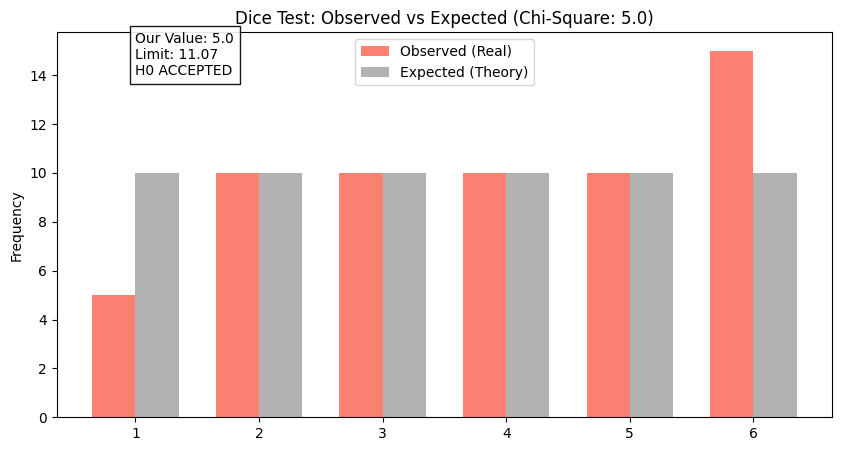

In [2]:
# Python Solution & Visualization: Dice Test
# We will calculate the Chi-Square visually to compare Observed vs Expected

import matplotlib.pyplot as plt
import numpy as np

# Data from the problem
faces = ['1', '2', '3', '4', '5', '6']

# Observed values (Based on text: 6 is 15, others avg 9, let's distribute 45 among 1-5)
# Let's say: 1 is 5 (to match calculation), others are 10, 6 is 15.
observed = [5, 10, 10, 10, 10, 15] 
expected = [10, 10, 10, 10, 10, 10]

# Calculation in Python
chi_sq_terms = [(o - e)**2 / e for o, e in zip(observed, expected)]
chi_sq_total = sum(chi_sq_terms)

# Visualization
x = np.arange(len(faces))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, observed, width, label='Observed (Real)', color='salmon')
plt.bar(x + width/2, expected, width, label='Expected (Theory)', color='gray', alpha=0.6)

plt.ylabel('Frequency')
plt.title(f'Dice Test: Observed vs Expected (Chi-Square: {chi_sq_total})')
plt.xticks(x, faces)
plt.legend()

# Show Result on Plot
limit = 11.07
result_text = "H0 ACCEPTED" if chi_sq_total < limit else "H0 REJECTED"
plt.text(0, 14, f"Our Value: {chi_sq_total}\nLimit: {limit}\n{result_text}", 
         bbox=dict(facecolor='white', alpha=0.9))

plt.show()

## 4. CRITICAL NOTES AND INTERPRETATION

1.  **Limitation of ANOVA:** 
    When ANOVA says "Difference Exists" (H0 Rejected), it **does not** tell us *which* group is different. It only says "there is a difference somewhere." To understand if A is better than C, we must continue with further analyses.

2.  **Positivity Principle:** 
    In the Chi-Square formula, since we take the square, the result is **never negative**. The closer the value is to 0, the more compatible the Observed and Expected values are. As the value grows, the mismatch (or probability of cheating/difference) increases.

3.  **Which Test Should I Choose?**

| Data Type | Examples | Test to Use |
| :--- | :--- | :--- |
| **Numerical** | Length, Weight, Coordinates | **T-Test** (2 groups) or **ANOVA** (3+ groups) |
| **Categorical** | Gender, Brand, Pass/Fail | **Chi-Square Test** |